In [1]:
from similarityfunctions import *
from hypfunctions import *
import networkx as nx
from itertools import permutations, combinations
import pandas as pd
import matplotlib. pyplot as plt 

13


C:\Users\hanaa\Anaconda3\lib\site-packages\networkx\drawing\layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


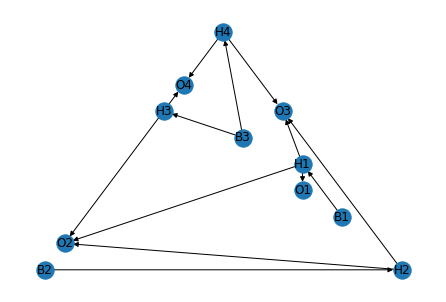

In [2]:
# make the graph
dg = nx.DiGraph()
dg.add_nodes_from(['B1', 'B2', 'B3', 'H1', 'H2', 'H3', 'H4', 'O1', 'O2', 'O3', 'O4'])
dg.add_weighted_edges_from([('B1', 'H1', .00131998), ('B2', 'H2', .253215), ('B3', 'H3', .164102),
                            ('B3', 'H4', .00192481), ('H1', 'O1', .0998799), ('H1', 'O2', .132026),
                           ('H1', 'O3', .149337), ('H2', 'O2', .0873762), ('H2', 'O3', .118668),
                           ('H3', 'O2', .123934), ('H3', 'O4', .0342232), ('H4', 'O3', .0717882),
                           ('H4', 'O4', .04508)])

print(len(dg.edges()))
nx.draw_planar(dg, with_labels = True)

In [3]:
bnodes = [node for node in list(dg.nodes()) if not list(dg.predecessors(node)) and list(dg.successors(node))] #root nodes
observations = [node for node in list(dg.nodes()) if not list(dg.successors(node)) and list(dg.predecessors(node))] #terminal nodes
hypotheses = findHypotheses(dg, observations, bnodes)

print(bnodes) 
print(observations) 
print(hypotheses)

['B1', 'B2', 'B3']
['O1', 'O2', 'O3', 'O4']
[['H1', 'H4'], ['H1', 'H2', 'H4'], ['H1', 'H2', 'H3', 'H4'], ['H1']]


In [4]:
# learn the CPTable


########## BACKGROUND
# B1
cpt_B1 = CPT(0)
cpt_B1.add_entry_self((1-.0260472, .0260472))
dg.nodes['B1']['CPT'] = cpt_B1

# B2
cpt_B2 = CPT(0)
cpt_B2.add_entry_self((1-.615996, .615996))
dg.nodes['B2']['CPT'] = cpt_B2

# B3
cpt_B3 = CPT(0)
cpt_B3.add_entry_self((1-.318892, .318892))
dg.nodes['B3']['CPT'] = cpt_B3


########### HYPOTHESES
# H1
cpt_H1 = CPT(1)
cpt_H1.add_entry([1], (1-.371292, .371292))
cpt_H1.add_entry([0], (1-.532645, .532645))
dg.nodes['H1']['CPT'] = cpt_H1

# H2
cpt_H2 = CPT(1)
cpt_H2.add_entry([1], (1-.50549, .50549))
cpt_H2.add_entry([0], (1-.694085, .694085))
dg.nodes['H2']['CPT'] = cpt_H2

# H3
cpt_H3 = CPT(1)
cpt_H3.add_entry([1], (1-.646029, .646029))
cpt_H3.add_entry([0], (1-.164357, .164357))
dg.nodes['H3']['CPT'] = cpt_H3

# H4
cpt_H4 = CPT(1)
cpt_H4.add_entry([1], (1-.371292, .371292))
cpt_H4.add_entry([0], (1-.425611, .425611))
dg.nodes['H4']['CPT'] = cpt_H4


############# OBSERVED EFFECTS
cpt_O1 = CPT(1)
cpt_O1.add_entry([1], (1-.845371, .845371))
cpt_O1.add_entry([0], (1-.503606, .503606))
dg.nodes['O1']['CPT'] = cpt_O1

cpt_O2 = CPT(3)
cpt_O2.add_entry([1, 1, 1], (1-.485969, .485969))
cpt_O2.add_entry([1, 1, 0], (1-.702458, .702458))
cpt_O2.add_entry([1, 0, 1], (1-.521399, .521399))
cpt_O2.add_entry([1, 0, 0], (1-.30641, .30641))
cpt_O2.add_entry([0, 1, 1], (1-.876099, .876099))
cpt_O2.add_entry([0, 1, 0], (1-.131251, .131251))
cpt_O2.add_entry([0, 0, 1], (1-.292697, .292697))
cpt_O2.add_entry([0, 0, 0], (1-.255582, .255582))
dg.nodes['O2']['CPT'] = cpt_O2


cpt_O3 = CPT(3)
cpt_O3.add_entry([1, 1, 1], (1-.443595, .443595))
cpt_O3.add_entry([1, 1, 0], (1-.0692005, .0692005))
cpt_O3.add_entry([1, 0, 1], (1-.760635, .760635))
cpt_O3.add_entry([1, 0, 0], (1-.562661, .562661))
cpt_O3.add_entry([0, 1, 1], (1-.398679, .398679))
cpt_O3.add_entry([0, 1, 0], (1-.714025, .714025))
cpt_O3.add_entry([0, 0, 1], (1-.403932, .403932))
cpt_O3.add_entry([0, 0, 0], (1-.315988, .315988))
dg.nodes['O3']['CPT'] = cpt_O3


cpt_O4 = CPT(2)
cpt_O4.add_entry([1, 1], (1-.76531, .76531))
cpt_O4.add_entry([1, 0], (1-.879789, .879789))
cpt_O4.add_entry([0, 1], (1-.894966, .894966))
cpt_O4.add_entry([0, 0], (1-.656085, .656085))
dg.nodes['O4']['CPT'] = cpt_O4

# Edge Generation
Generate edges from the partial explanation hypothesis node to all missing observations

In [5]:
# get partial explanations
single_hyp = [h for h in hypotheses if not isinstance(h, list)]

# for each partial explanation, identify observations that are not descendants, add edges to those observations
new_edges = []
for s in single_hyp:
    descendants = list(nx.descendants(dg, s))
    missing_obs = list(set(observations) - set(descendants))
    for o in missing_obs:
        dg.add_edge(s, o)
        new_edges.append((s, o))
new_edges

[]

In [6]:
# add edge weight
dg.add_weighted_edges_from([('H1', 'O4', .125332)])

# learn updated CPT table
cpt_O4 = CPT(3)
cpt_O4.add_entry([1, 1, 1], (1-.142328, .142328))
cpt_O4.add_entry([1, 1, 0], (1-.248076, .248076))
cpt_O4.add_entry([1, 0, 1], (1-.492232, .492232))
cpt_O4.add_entry([1, 0, 0], (1-.880375, .880375))
cpt_O4.add_entry([0, 1, 1], (1-.627151, .627151))
cpt_O4.add_entry([0, 1, 0], (1-.127184, .127184))
cpt_O4.add_entry([0, 0, 1], (1-.155563, .155563))
cpt_O4.add_entry([0, 0, 0], (1-.501294, .501294))
dg.nodes['O4']['CPT'] = cpt_O4

In [7]:
hypotheses = findHypotheses(dg, observations, bnodes)
print(hypotheses)

[['H1'], ['H1', 'H3'], ['H1', 'H2', 'H3'], ['H1', 'H3', 'H4'], ['H1']]


## Compile graph data

In [8]:
scenarios = get_possible_truths(dg, bnodes, observations)
truths = [list(k) for k in list(scenarios.keys())]
falses = list(scenarios.values())

In [9]:
fbe1 = get_all_FBE(dg, observations, bnodes)
fbe2 = get_all_FBE(dg, observations, bnodes, flipped=True)

(['H1'], 0.061747993574619145)
(['H1', 'H3'], 0.029422349467866177)
(['H1', 'H2', 'H3'], 0.024779839543526753)
(['H1', 'H3', 'H4'], 0.009785682772619538)
(['H1'], 0.061747993574619145)
(['H1'], 0.10089576210436627)
(['H1', 'H3'], 0.044381596915870666)
(['H1', 'H2', 'H3'], 0.03134642496631645)
(['H1', 'H3', 'H4'], 0.014644198143489686)
(['H1'], 0.10089576210436627)
(['H1'], 0.282675054092777)
(['H1', 'H3'], 0.25459096566976586)
(['H1', 'H2', 'H3'], 0.2142767748715824)
(['H1', 'H3', 'H4'], 0.0723727445576324)
(['H1'], 0.282675054092777)
(['H1'], 0.4063221935575624)
(['H1', 'H3'], 0.19360877792658376)
(['H1', 'H2', 'H3'], 0.1630595291677429)
(['H1', 'H3', 'H4'], 0.06439302493002087)
(['H1'], 0.4063221935575624)
(['H1'], 0.35229525525435745)
(['H1', 'H3'], 0.11754951193075028)
(['H1', 'H2', 'H3'], 0.09667778518885595)
(['H1', 'H3', 'H4'], 0.039051199166426784)
(['H1'], 0.35229525525435745)
(['H1'], 0.1047858840246318)
(['H1', 'H3'], 0.032297390210684056)
(['H1', 'H2', 'H3'], 0.015278471498

In [150]:
# get fbe_1 flipped

def get_flipped_prob(graph, observations, bnodes, hyp, flipped=False):
    hypotheses = findHypotheses(graph, observations, bnodes)
    not_hyp = bnodes + observations
    possibly_true = []
    for i in range(1, len(not_hyp) + 1):
        possibly_true += [list(x) for x in it.combinations(not_hyp, i)]
    possibly_true

    probs = []
    for t in possibly_true:
        false_nodes = list(set(not_hyp) - set(t))
        observeData(graph, t, false_nodes)
        #if isinstance(hyp, list): prob.append(calculateTotalMarginalProbabilityObs(graph, hyp, observations, bnodes))
        #else: prob.append(calculateTotalMarginalProbabilityObs(graph, list(hyp), observations, bnodes))
            
        if isinstance(hyp, list): 
            for x in hyp:
                graph.nodes[x]['value'] = 1
            if flipped:
                prob = calculateTotalMarginalProbabilityObs(graph, list(hyp), observations, bnodes)
            else:
                prob = calculateTotalMarginalProbability(graph, list(hyp), observations, bnodes)
            for x in hyp:
                graph.nodes[x]['value'] = None
        else:
            graph.nodes[hyp]['value'] = 1
            if flipped:
                prob = calculateTotalMarginalProbabilityObs(graph, list(hyp), observations, bnodes)
            else:
                prob = calculateTotalMarginalProbability(graph, list(hyp), observations, bnodes)
            graph.nodes[hyp]['value'] = None
        probs.append(prob)
    
    return probs

In [151]:
#hyp_check1 = get_flipped_prob(dg, observations, bnodes, 'H1')
#hyp_check2 = get_flipped_prob(dg, observations, bnodes, ['H1'])
prob2 = get_flipped_prob(dg, observations, bnodes, ['H1'])
print(prob2)

[0.061747993574619145, 0.10089576210436627, 0.282675054092777, 0.4063221935575624, 0.35229525525435745, 0.1047858840246318, 0.3291348939624564, 0.054953062869440954, 0.1695703902594035, 0.2617998990495351, 0.21987251284365653, 0.057184486302305694, 0.20269344450930904, 0.21983104286840247, 0.37683863733916567, 0.29067477294261285, 0.13959036792191035, 0.3039324602770499, 0.6798519946347609, 0.33105298917609044, 0.2049874360645373, 0.32891687467432845, 0.7456143905175635, 0.3867910252083402, 0.7255622139049436, 0.2483090250714318, 0.6773686578255672, 0.2046703588768382, 0.1274055750429452, 0.23858869891941012, 0.1751508041273647, 0.07754783653432294, 0.18451002744472428, 0.5238936839462514, 0.204098855511168, 0.1178599937583418, 0.2025338945830579, 0.6029837832111647, 0.2463331854320108, 0.5780511119116778, 0.14615332624360383, 0.5210528526186833, 0.11765774117418634, 0.6029259001670535, 0.30891403228303727, 0.23679206256850516, 0.27484209836398954, 0.6883064194865787, 0.466457014892003

In [152]:
# for all possible truth value combinations, columns: True nodes, False nodes (or not), FBE1, probability1, FBE2, probability2
original_data = {}
original_data['True Nodes'] = truths
original_data['# of True Nodes'] = [len(t) for t in original_data.get('True Nodes')]
original_data['False Nodes'] = falses
original_data['Best Explanation'] = [v[0] for v in list(fbe1.values())]
original_data['Hypothesis'] = [v[0] for v in list(fbe2.values())]
#original_data['P(O|H)'] = [v[1] for v in list(fbe1.values())]
#original_data['P(H|O)'] = hyp_check1
original_data['P(O|H)'] = prob2
original_data['P(H|O)'] = [v[1] for v in list(fbe2.values())]




df1 = pd.DataFrame(original_data, columns=list(original_data.keys()))
df1

,True Nodes,# of True Nodes,False Nodes,Best Explanation,Hypothesis,P(O|H),P(H|O)
0,[B1],1,"[O1, B2, O4, B3, O2, O3]",[H1],"[H1, H2, H3]",0.061748,0.048097
1,[B2],1,"[O1, O4, B3, O2, O3, B1]",[H1],"[H1, H2, H3]",0.100896,0.048097
2,[B3],1,"[O1, B2, O4, O2, O3, B1]",[H1],"[H1, H2, H3]",0.282675,0.049059
3,[O1],1,"[B2, O4, B3, O2, O3, B1]",[H1],"[H1, H2, H3]",0.406322,0.262951
4,[O2],1,"[O1, B2, O4, B3, O3, B1]",[H1],"[H1, H2, H3]",0.352295,0.045471
...,...,...,...,...,...,...,...
122,"[B1, B2, B3, O2, O3, O4]",6,[O1],[H1],[H1],0.156447,0.010192
123,"[B1, B2, O1, O2, O3, O4]",6,[B3],[H1],[H1],0.714775,0.085379
124,"[B1, B3, O1, O2, O3, O4]",6,[B2],[H1],[H1],0.419132,0.047504
125,"[B2, B3, O1, O2, O3, O4]",6,[B1],[H1],[H1],0.658555,0.055718


In [13]:
df1.to_excel(r'C:\Users\hanaa\OneDrive\amistad 2020\figures\refined-hyp-data-3.xlsx')

Graphs: 
1. len of True Nodes list vs P(H|O)
2. len of hyp vs P(H|O)

In [157]:
[1]*3

[1, 1, 1]

In [160]:
def hyp_plot(data_dict, hypothesis):
    selected_hyps = data_dict['Hypothesis']
    probs = data_dict['P(O|H)']
    probs_flipped = data_dict['P(H|O)']
    
    i_list = []
    count = 0
    for s in selected_hyps:
        if (s == hypothesis):
            i_list.append(count)
        count +=1
    
    probs_list_flipped = [probs_flipped[i] for i in i_list]
    if (len(hypothesis) == 1): probs_list = [1]*len(probs_list_flipped)
    else: probs_list = [probs[i] for i in i_list]
    
    
    return {tuple(hypothesis): tuple(probs_list)}, {tuple(hypothesis) : tuple(probs_list_flipped)} 

In [161]:
#calculateTotalMarginalProbability(dg, 'H1', observations, bnodes)
hyp_plot(original_data, ['H1'])

({('H1',): (1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1)},
 {('H1',): (0.024903195428161953,
   0.024903195428161936,
   0.024997087009306303,
   0.017697052012946357,
   0.13614806551358863,
   0.042020439117766456,
   0.016386249398963455,
   0.02499708700930631,
   0.017697052012946368,
   0.13614806551358855,
   0.042020439117766435,
   0.01638624939896344,
   0.016887116154575887,
   0.13666137944463375,
   0.03379797915054781,
   0.023160323994281067,
   0.09675141504657259,
   0.025099671980603457,
   0.009672182608775793,
   0.22972961499735067,
   0.08958513629817907,
   0.014262320042213127,
   0.016887116154575887,
   0.1366613794446338,
   0.03

C:\Users\hanaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
C:\Users\hanaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


([<matplotlib.axis.XTick at 0x1a028b32288>,
 <a list of 3 Text xticklabel objects>)

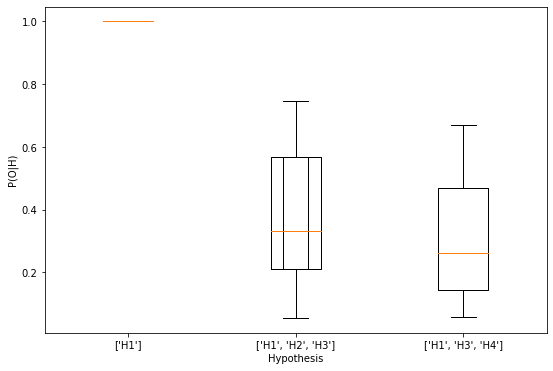

In [162]:
fig = plt.figure(1, figsize=(9, 6))

plot_probs = []
plot_flipped = []
unique_hyps = [list(x) for x in set(tuple(x) for x in original_data.get('Hypothesis'))]
for h in unique_hyps:
    probs_dict = hyp_plot(original_data, h)
    probs = list(probs_dict[0].values())
    flip_probs = list(probs_dict[1].values())
    
    # best expl. 1 probs
    plot_probs += probs
    ax1 = fig.add_subplot(111)
    ax1.boxplot(plot_probs)

ax1.set_xlabel('Hypothesis')
ax1.set_ylabel('P(O|H)')
plt.xticks([x for x in range(1, len(unique_hyps) + 1)], unique_hyps)

C:\Users\hanaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app
C:\Users\hanaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


([<matplotlib.axis.XTick at 0x1a028b31788>,
 <a list of 3 Text xticklabel objects>)

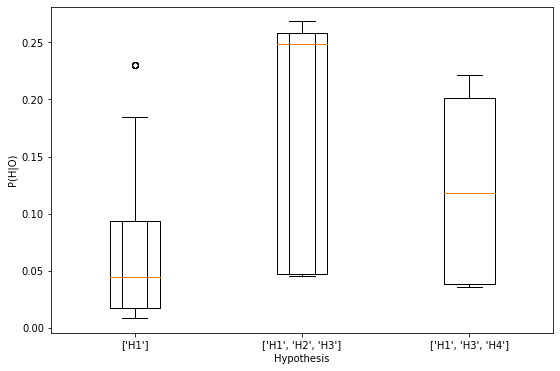

In [163]:
plt.close()

fig = plt.figure(1, figsize=(9, 6))

plot_probs = []
plot_flipped = []
unique_hyps = [list(x) for x in set(tuple(x) for x in original_data.get('Hypothesis'))]
for h in unique_hyps:
    probs_dict = hyp_plot(original_data, h)
    probs = list(probs_dict[0].values())
    flip_probs = list(probs_dict[1].values())
    
    # best expl. 2 probs
    plot_flipped += flip_probs
    ax2 = fig.add_subplot(111)
    ax2.boxplot(plot_flipped)

ax2.set_xlabel('Hypothesis')
ax2.set_ylabel('P(H|O)')
plt.xticks([x for x in range(1, len(unique_hyps) + 1)], unique_hyps)

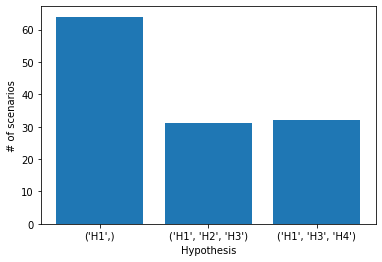

In [165]:
# bar charts of number of times a hypothesis shows up
count_dict = {}
for h in unique_hyps:
    count = original_data.get('Hypothesis').count(h)
    count_dict[tuple(h)] = count

plt.bar(range(len(count_dict)), count_dict.values(), align='center')
plt.xticks(range(len(count_dict)), list(count_dict.keys()))
plt.ylabel('# of scenarios')
plt.xlabel('Hypothesis')
plt.show()
plt.close()

# Unused

[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7]


Text(0, 0.5, 'P(H|O)')

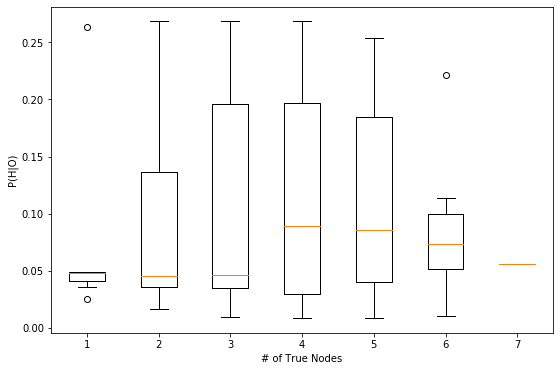

In [14]:
# create dict {len true nodes : list of probs}
len_true_nodes = [len(t) for t in original_data.get('True Nodes')]
print(len_true_nodes)

p1, p2, p3, p4, p5, p6, p7 = [], [], [], [], [], [], []
true_probs_dict = {}
counter = 0
for t in original_data.get('True Nodes'):
    lent = len(t)
    prob = original_data.get('P(H|O)')[counter]
    if (lent == 1): p1.append(prob)
    elif not isinstance(t, list): p1.append(prob)
    elif (lent == 2): p2.append(prob)
    elif (lent == 3): p3.append(prob)
    elif (lent == 4): p4.append(prob)
    elif (lent == 5): p5.append(prob)
    elif (lent == 6): p6.append(prob)
    elif (lent == 7): p7.append(prob)
    counter += 1
    
true_probs_dict[1] = p1
true_probs_dict[2] = p2
true_probs_dict[3] = p3
true_probs_dict[4] = p4
true_probs_dict[5] = p5
true_probs_dict[6] = p6
true_probs_dict[7] = p7

true_data = [p1, p2, p3, p4, p5, p6, p7]

####### CREATING THE BOX PLOT
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(true_data)

ax.set_xlabel('# of True Nodes')
ax.set_ylabel('P(H|O)')

Text(0, 0.5, 'P(H|O)')

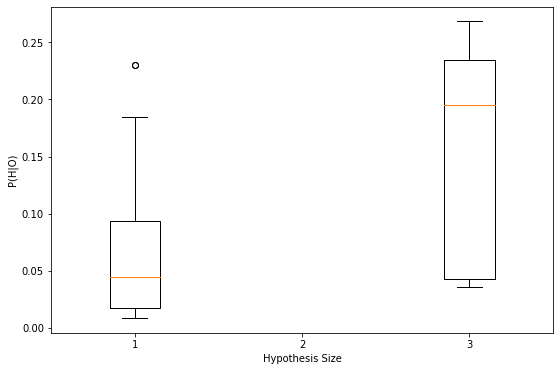

In [16]:
plt.close()

# create dict {len true nodes : list of probs}


p1, p2, p3, p4 = [], [], [], []
hyp_size = {}
counter = 0
for h in original_data.get('Hypothesis'):
    lenH = len(h)
    prob = original_data.get('P(H|O)')[counter]
    if (lenH == 1) or not isinstance(h, list): p1.append(prob)
    if (lenH == 2): p2.append(prob)
    if (lenH == 3): p3.append(prob)
    if (lenH == 4): p4.append(prob)
    counter += 1
    
hyp_size['H1'] = p1

hyp_size_data = [p1, p2, p3]

####### CREATING THE BOX PLOT
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
ax.boxplot(hyp_size_data)

ax.set_xlabel('Hypothesis Size')
ax.set_ylabel('P(H|O)')

#ax1.set_xticklabels()

Text(0, 0.5, 'P(H|O)')

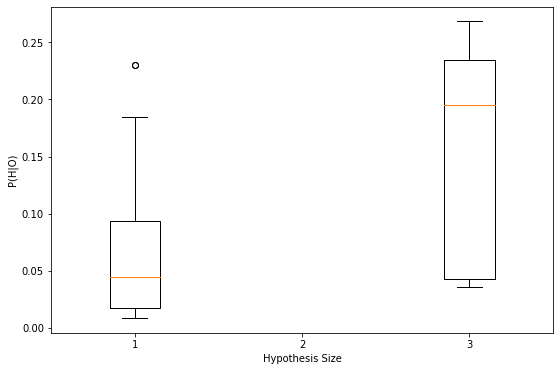

In [17]:
plt.close()

# create dict {len true nodes : list of probs}


p1, p2, p3, p4 = [], [], [], []
hyp_size = {}
counter = 0
for h in original_data.get('Hypothesis'):
    lenH = len(h)
    prob = original_data.get('P(H|O)')[counter]
    if (lenH == 1) or not isinstance(h, list): p1.append(prob)
    if (lenH == 2): p2.append(prob)
    if (lenH == 3): p3.append(prob)
    if (lenH == 4): p4.append(prob)
    counter += 1
    
hyp_size['H1'] = p1

hyp_size_data = [p1, p2, p3]

####### CREATING THE BOX PLOT
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
ax.boxplot(hyp_size_data)

ax.set_xlabel('Hypothesis Size')
ax.set_ylabel('P(H|O)')

#ax1.set_xticklabels()

In [ ]:
"""# for each hyp, count the number of times it is the best explanation
count1 = fbeCount(fbe1, hypotheses)
count2 = fbeCount(fbe2, hypotheses)

# for each hyp, count the number of its observed descendants
hyp_desc_dict = getHypDesc(dg, hypotheses, observations)
desc_count = {k:len(v) for k,v in hyp_desc_dict.items()}
hyp_desc_dict, desc_count"""

In [ ]:
"""blockPrint()
hyp_dict = getHypData(dg, hypotheses, observations, bnodes)"""

In [ ]:
"""# for each possible hypothesis, get the count & truth value combo & num of observed descendants
hyp_data = {}
hyp_data['Best Explanations'] = list(hyp_dict.keys())
hyp_data['# of Observed Descendants'] = [v[0] for v in list(hyp_dict.values())]
hyp_data['Best Expl. Count'] = [v[1] for v in list(hyp_dict.values())]
hyp_data['Best expl. (flipped) count'] = [v[2] for v in list(hyp_dict.values())]

df2 = pd.DataFrame(hyp_data, columns=list(hyp_data.keys()))
df2"""

Export both data tables to excel

In [ ]:
"""df1.to_excel(r'C:\Users\hanaa\OneDrive\amistad 2020\figures\refined-hyp-data.xlsx')
df2.to_excel(r'C:\Users\hanaa\OneDrive\amistad 2020\figures\refined-hyp-counts.xlsx')"""